# Environment

In [128]:
import os
import sys
import numpy as np
import pandas as pd

from dotenv import load_dotenv
load_dotenv()
sys.path.insert(0, os.getenv('PROJECT_FUNCTIONS_PATH'))

from evaluated_helpers import (
    load_GRNs_gene_sets,
    analyze_gene_sets_gene_set,
    analyze_gene_sets_cell_types,
    create_heatmap,
    remove_duplicates_preserve_order_GRNs,
    print_number_of_duplicate_genes,
    better_hist_GRNs,
    visualize_weight_distributions,
    plot_gene_set_intersections
)

In [129]:
base_path = os.getenv('BASE_PATH')
root_dir = base_path
data_path = os.path.join(base_path, "data")
scplus_path = os.path.join(base_path, "all_ex")

# Load Gene Sets Data 

In [130]:
gere_sets_dict_celloracle, gene_sets_dict_cell_type_first_celloracle = load_GRNs_gene_sets(root_dir=root_dir, gene_set_list = ["all_ex"], weights_list="scores_grn_all_from_comb_run_new.csv")

# Analyse separately

In [131]:
set_selected = "all_ex"
cell_type_selected = "L4_RORB"
scored_gene_selected = "RARA"
score = "coef_mean"

### Remove duplicates

In [132]:
print(gene_sets_dict_cell_type_first_celloracle[set_selected][cell_type_selected].keys())
gois = gene_sets_dict_cell_type_first_celloracle[set_selected][cell_type_selected].keys()

dict_keys(['AHR', 'ARNT', 'ARNT2', 'CLOCK', 'AR', 'NR1I2', 'NR3C1', 'NR3C2', 'ESR1', 'RARA', 'ESR2', 'THRB', 'THRA', 'NR1I3'])


In [133]:
data={key: gene_sets_dict_cell_type_first_celloracle[set_selected][cell_type_selected][key]["targets"] for key in gois}
print_number_of_duplicate_genes(data)

for AHR total duplicates: 30 out of 47
for ARNT total duplicates: 20 out of 35
for ARNT2 total duplicates: 24 out of 42
for CLOCK total duplicates: 25 out of 48
for AR total duplicates: 42 out of 81
for NR1I2 total duplicates: 20 out of 38
for NR3C1 total duplicates: 25 out of 48
for NR3C2 total duplicates: 16 out of 28
for ESR1 total duplicates: 21 out of 36
for RARA total duplicates: 26 out of 49
for ESR2 total duplicates: 17 out of 37
for THRB total duplicates: 119 out of 202
for THRA total duplicates: 3 out of 9
for NR1I3 total duplicates: 1 out of 5


In [134]:
print(set_selected)
print(cell_type_selected)
print(scored_gene_selected)
coef = np.array(gene_sets_dict_cell_type_first_celloracle[set_selected][cell_type_selected][scored_gene_selected]["coef_mean"])
rep = np.array(gene_sets_dict_cell_type_first_celloracle[set_selected][cell_type_selected][scored_gene_selected]["targets"])=='HSP90AA1'
print(coef[rep])


all_ex
L4_RORB
RARA
[0.05392373 0.04613023 0.05392373 0.05392373]


In [136]:
gene_sets_dict_cell_type_first_celloracle = remove_duplicates_preserve_order_GRNs(gene_sets_dict_cell_type_first_celloracle)

In [137]:
data={key: gene_sets_dict_cell_type_first_celloracle[set_selected][cell_type_selected][key]["targets"] for key in gois}
print_number_of_duplicate_genes(data)

### Statistics

In [138]:
sets = list(gene_sets_dict_cell_type_first_celloracle.keys())
print(sets)

cell_types = list(gene_sets_dict_cell_type_first_celloracle[set_selected].keys())
print(cell_types)

scored_genes = list(gene_sets_dict_cell_type_first_celloracle[set_selected][cell_type_selected].keys())
print(scored_genes)

print(len(gene_sets_dict_cell_type_first_celloracle[set_selected][cell_type_selected][scored_gene_selected]['targets']))

['all_ex']
['L2-3_CUX2', 'L4_RORB', 'L5-6_THEMIS', 'L5-6_TLE4', 'PN_dev']
['AHR', 'ARNT', 'ARNT2', 'CLOCK', 'AR', 'NR1I2', 'NR3C1', 'NR3C2', 'ESR1', 'RARA', 'ESR2', 'THRB', 'THRA', 'NR1I3']
23


In [139]:
for cell_type in cell_types:
    strings = [f"{scored_gene}: {len(gene_sets_dict_cell_type_first_celloracle[set_selected][cell_type][scored_gene]['targets'])}" for scored_gene in scored_genes]
    print(f'{cell_type}: {strings}') 


L2-3_CUX2: ['AHR: 30', 'ARNT: 28', 'ARNT2: 23', 'CLOCK: 31', 'AR: 26', 'NR1I2: 16', 'NR3C1: 38', 'NR3C2: 10', 'ESR1: 37', 'RARA: 29', 'ESR2: 29', 'THRB: 69', 'THRA: 5', 'NR1I3: 11']
L4_RORB: ['AHR: 17', 'ARNT: 15', 'ARNT2: 18', 'CLOCK: 23', 'AR: 39', 'NR1I2: 18', 'NR3C1: 23', 'NR3C2: 12', 'ESR1: 15', 'RARA: 23', 'ESR2: 20', 'THRB: 83', 'THRA: 6', 'NR1I3: 4']
L5-6_THEMIS: ['AHR: 18', 'ARNT: 20', 'ARNT2: 20', 'CLOCK: 13', 'AR: 48', 'NR1I2: 7', 'NR3C1: 35', 'NR3C2: 10', 'ESR1: 49', 'RARA: 35', 'ESR2: 20', 'THRB: 85', 'THRA: 4', 'NR1I3: 6']
L5-6_TLE4: ['AHR: 20', 'ARNT: 18', 'ARNT2: 27', 'CLOCK: 23', 'AR: 40', 'NR1I2: 3', 'NR3C1: 40', 'NR3C2: 9', 'ESR1: 64', 'RARA: 50', 'ESR2: 17', 'THRB: 70', 'THRA: 6', 'NR1I3: 3']
PN_dev: ['AHR: 26', 'ARNT: 30', 'ARNT2: 14', 'CLOCK: 30', 'AR: 61', 'NR1I2: 9', 'NR3C1: 39', 'NR3C2: 6', 'ESR1: 42', 'RARA: 60', 'ESR2: 26', 'THRB: 74', 'THRA: 9', 'NR1I3: 2']


### Heatmap

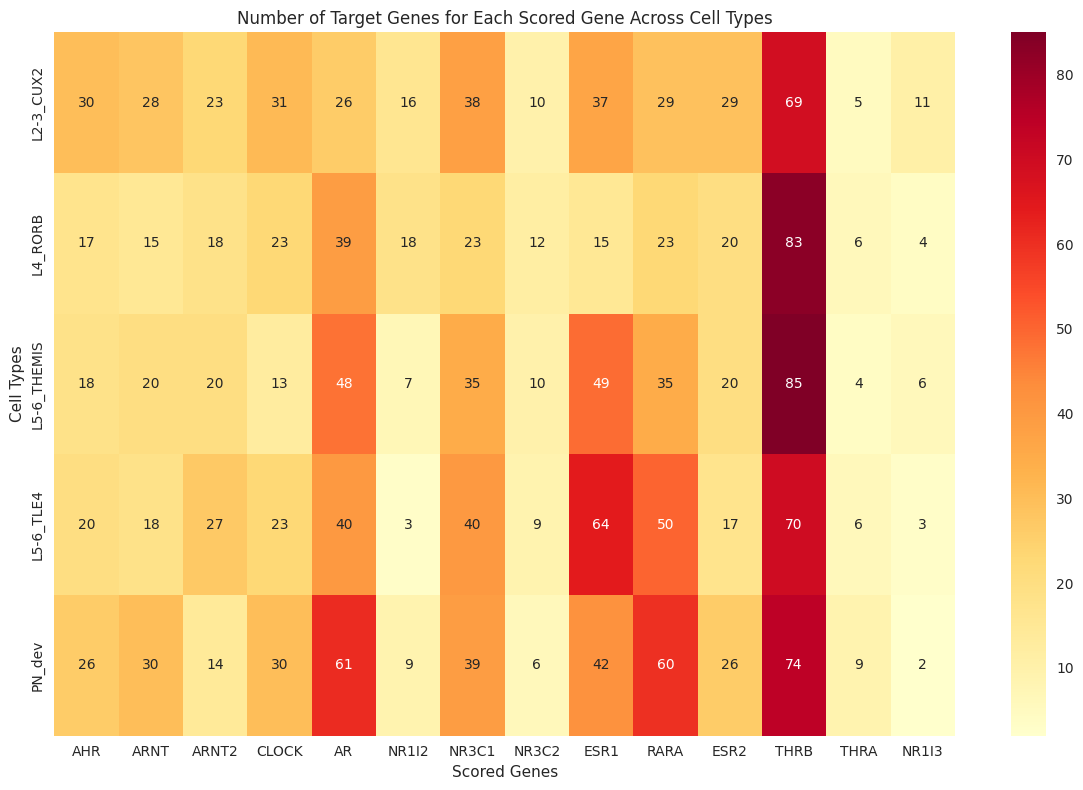

In [141]:
create_heatmap(gene_sets_dict_cell_type_first_celloracle, set_selected, scored_genes, cell_types)

### Venn diagrams


Shared genes between the sets:
Shared between RARA & THRB: {'H1FX', 'MLIP', 'CDH18'}
Shared between RARA & AR: {'MICAL2'}
Shared between THRB & AR: {'SNTG1', 'CNTN5', 'EPHA6', 'RASGRF2'}


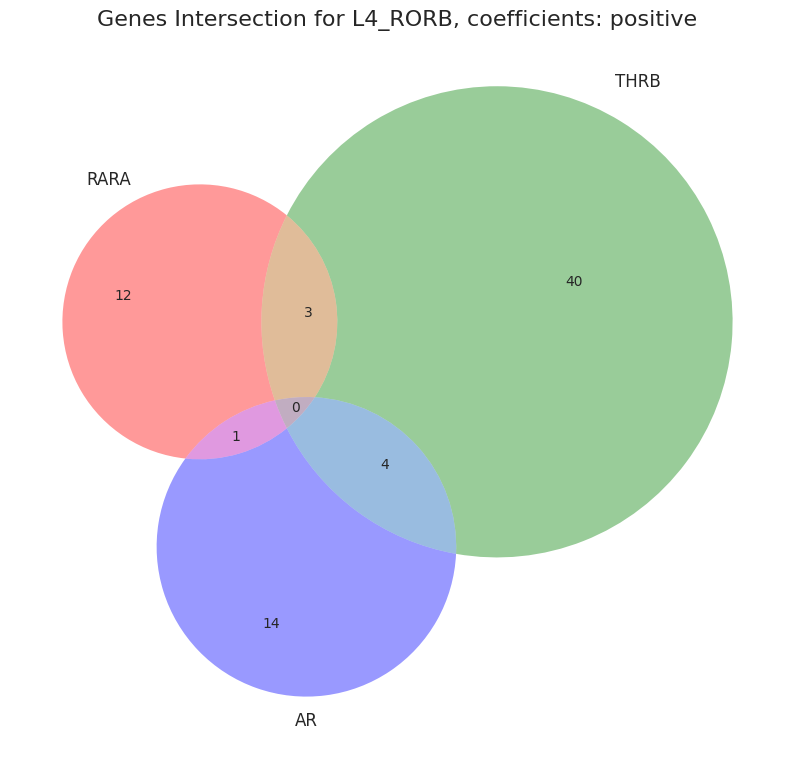

In [142]:
scored_genes=["RARA", "THRB", "AR"]
cell_type = "L4_RORB"
analyze_gene_sets_gene_set(gene_sets_dict_cell_type_first_celloracle, set_selected, cell_type=cell_type, scored_genes=scored_genes, mode="positive", printouts=True)

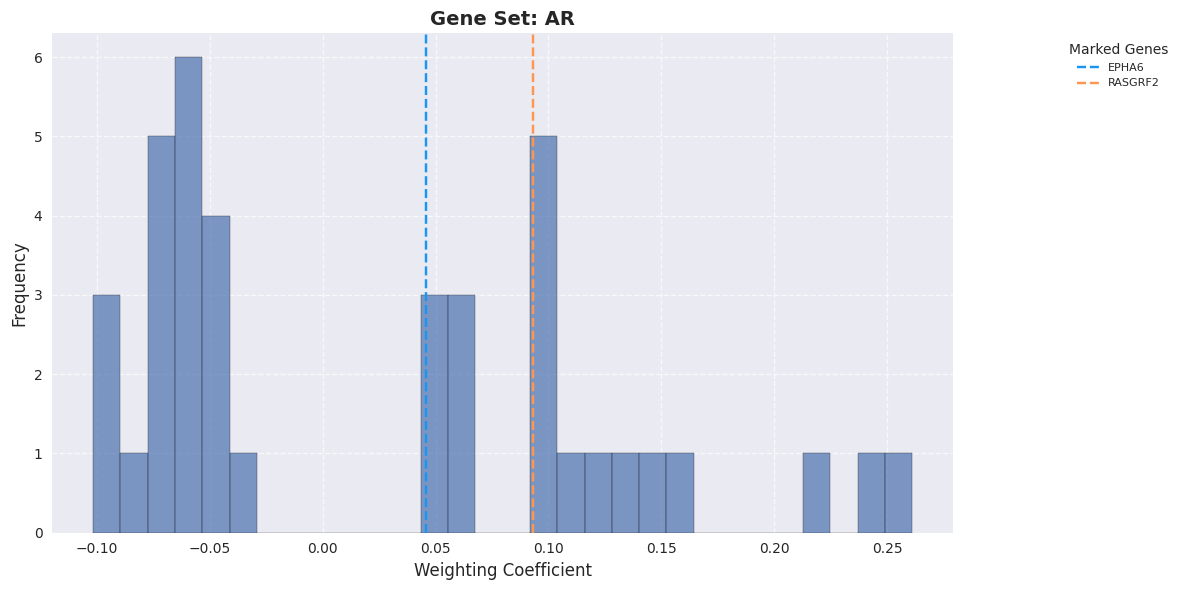

In [143]:
genes_to_mark = ['PAM', 'EPHA6', 'OXR1', 'RBFOX1', 'RASGRF2', 'CPVL']
better_hist_GRNs(gene_sets_dict_cell_type_first_celloracle, set_selected, "L4_RORB", "AR", score="coef_mean", bins=30, genes_to_mark=genes_to_mark)

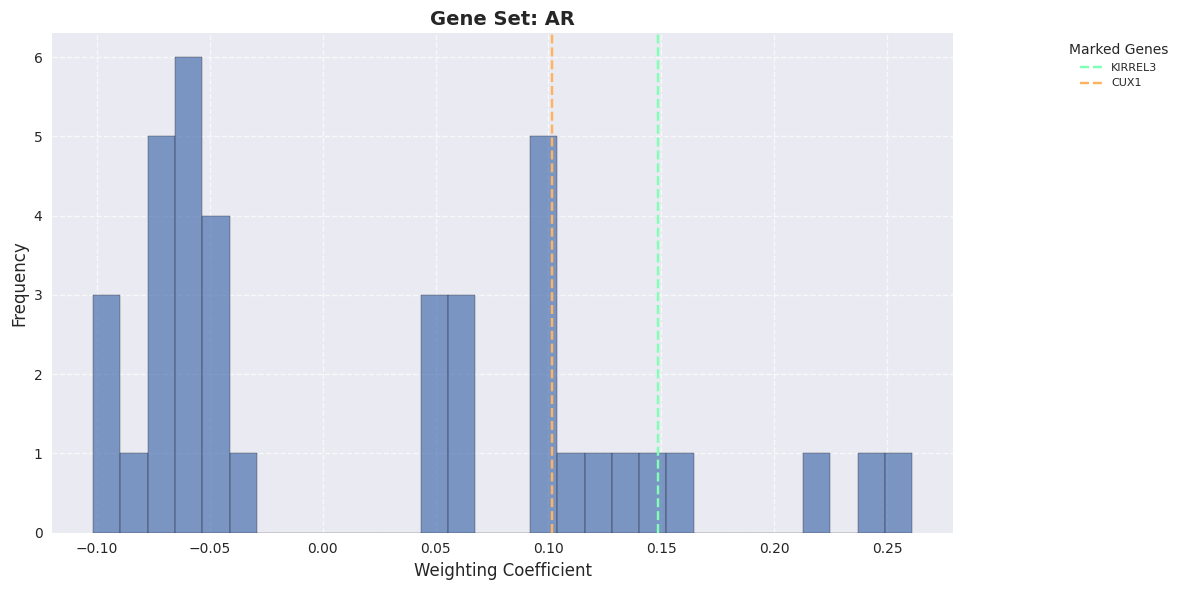

In [144]:
genes_to_mark = ['BDNF', 'PRKG2', 'KIRREL3', 'CUX1', 'UBB']
better_hist_GRNs(gene_sets_dict_cell_type_first_celloracle, set_selected, "L4_RORB", "AR", score="coef_mean", bins=30, genes_to_mark=genes_to_mark)

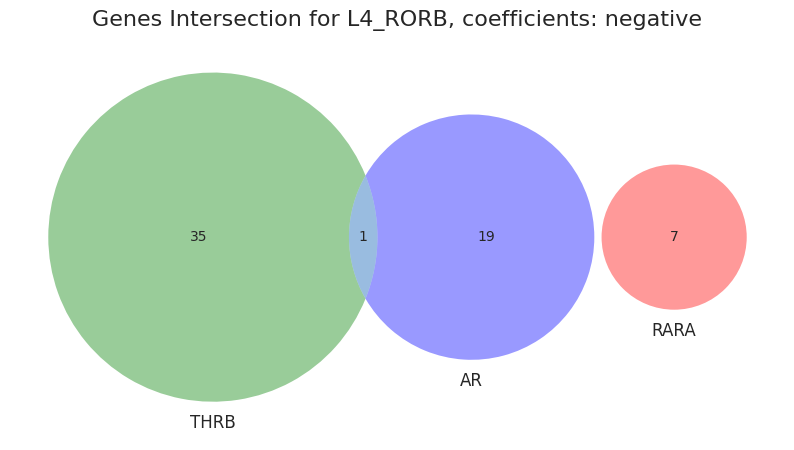

In [145]:
scored_genes=["RARA", "THRB", "AR"]
cell_type = "L4_RORB"
analyze_gene_sets_gene_set(gene_sets_dict_cell_type_first_celloracle, set_selected, cell_type=cell_type, scored_genes=scored_genes, mode="negative")


Unique genes for each set:
L2-3_CUX2: {'LINC-PINT', 'PHYHIPL', 'RASGRF2'}
L4_RORB: {'PTPRZ1', 'ELMO1'}
L5-6_THEMIS: set()


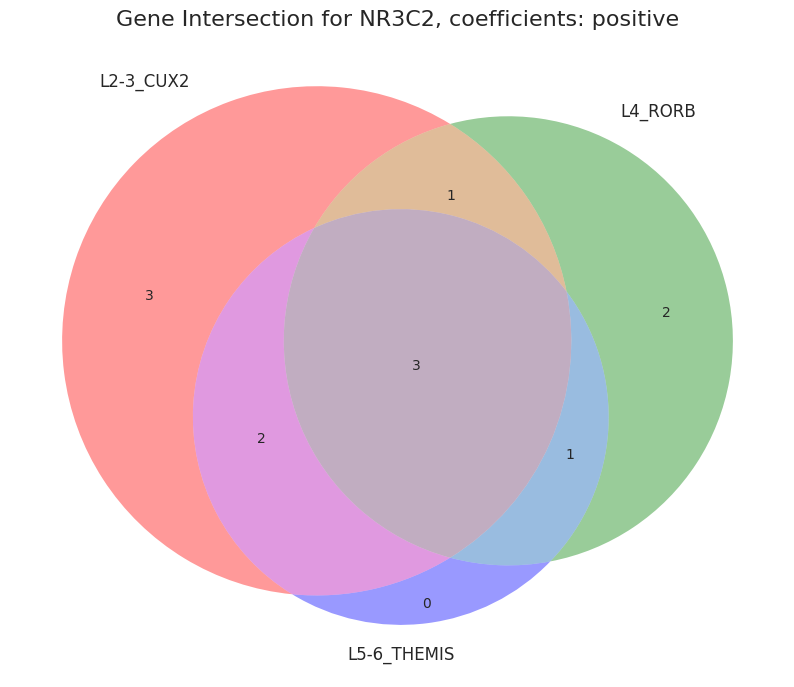

In [146]:
cell_types=["L2-3_CUX2", "L4_RORB", "L5-6_THEMIS"]
scored_gene="NR3C2"

analyze_gene_sets_cell_types(gene_sets_dict_cell_type_first_celloracle, set_selected, scored_gene, cell_types, mode = "positive", printouts=True)

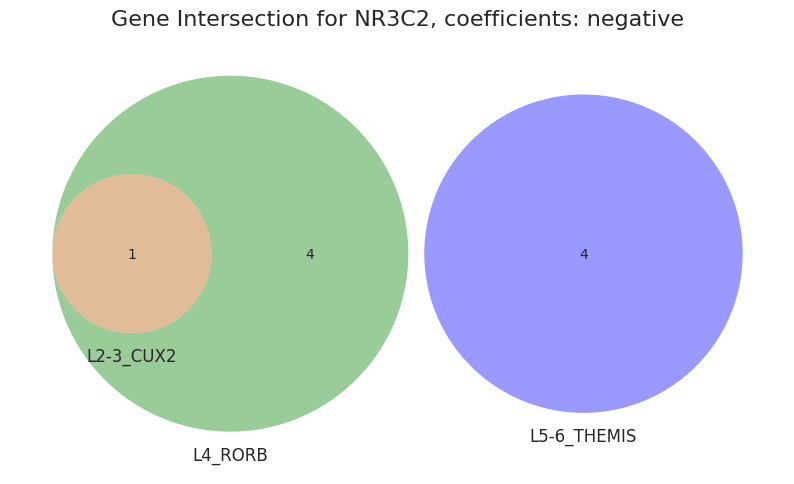

In [147]:
cell_types=["L2-3_CUX2", "L4_RORB", "L5-6_THEMIS"]
scored_gene="NR3C2"

analyze_gene_sets_cell_types(gene_sets_dict_cell_type_first_celloracle, set_selected, scored_gene, cell_types, mode = "negative")

### Histograms

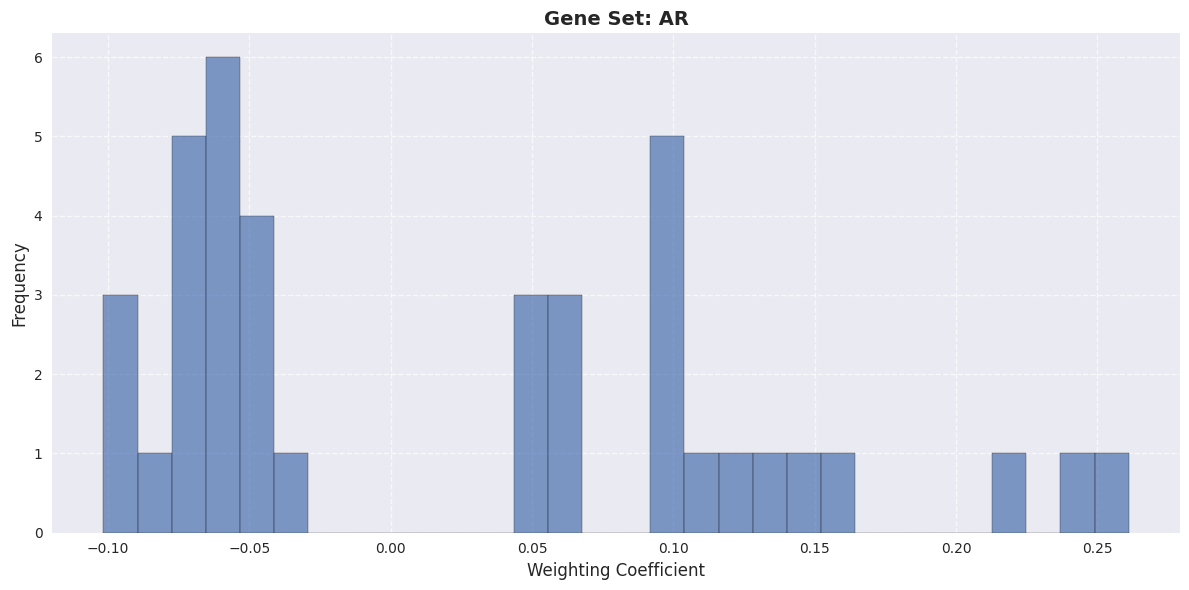

In [148]:
better_hist_GRNs(gene_sets_dict_cell_type_first_celloracle, set_selected, cell_type_selected, "AR", score="coef_mean", bins=30)

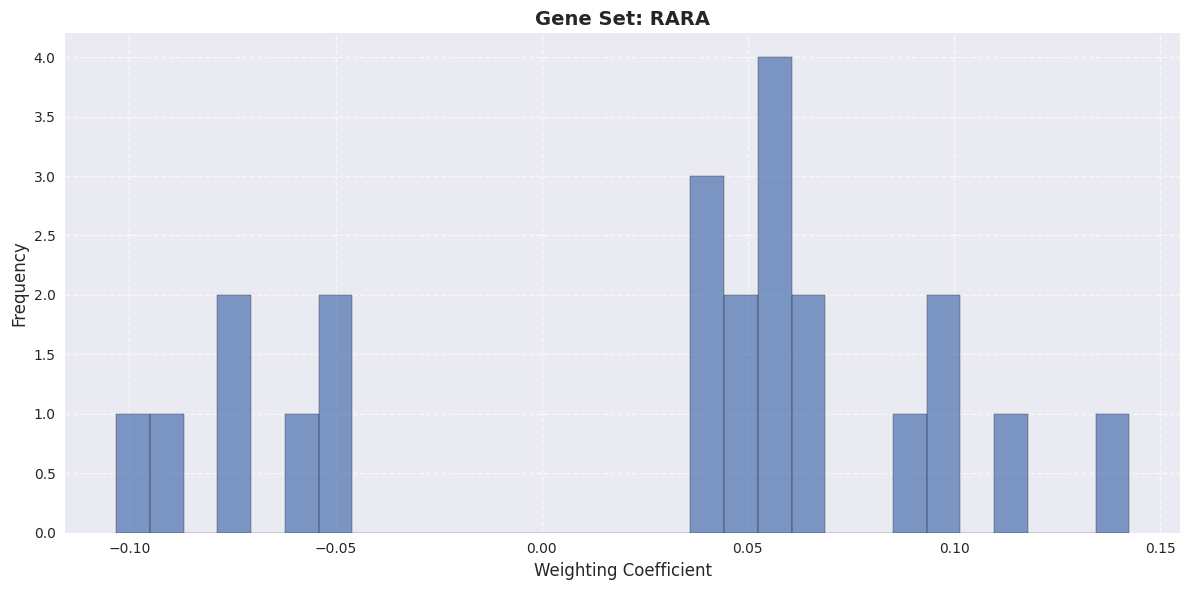

In [149]:
better_hist_GRNs(gene_sets_dict_cell_type_first_celloracle, set_selected, cell_type_selected, scored_gene_selected, score="coef_mean", bins=30)

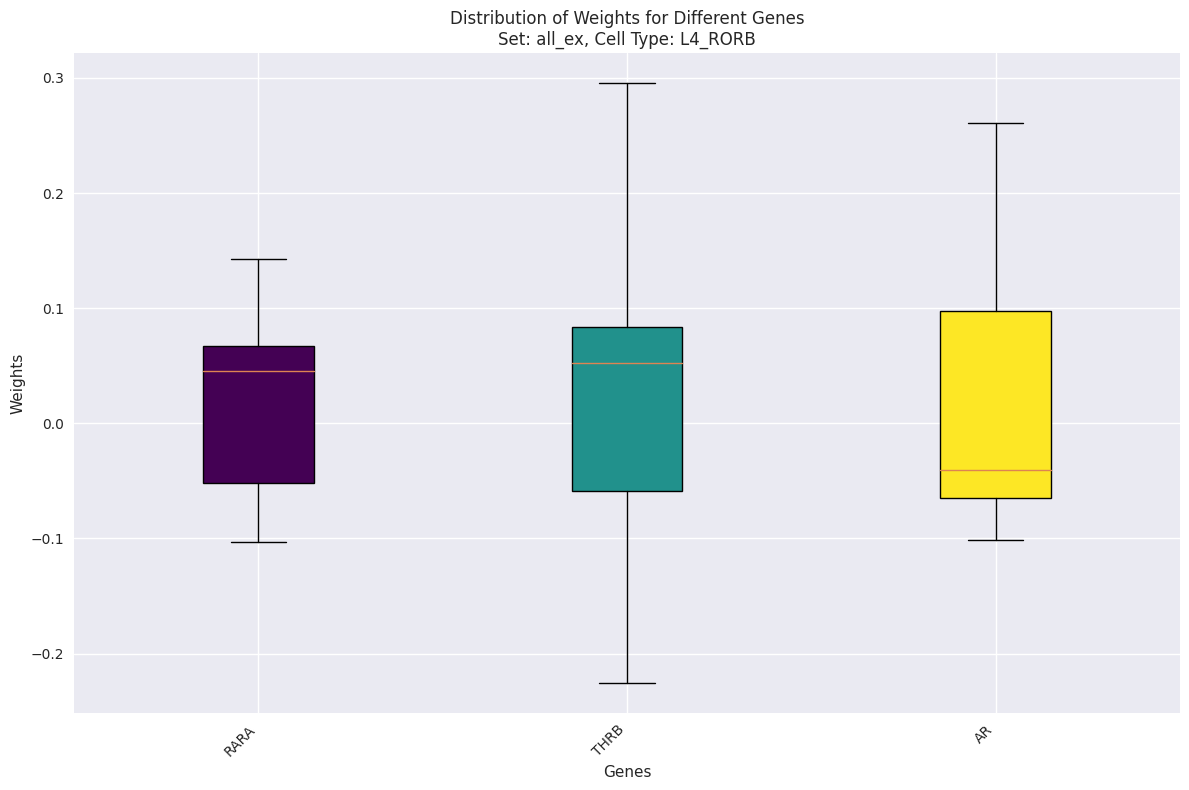

In [150]:
visualize_weight_distributions(gene_sets_dict_cell_type_first_celloracle, set_selected, cell_type_selected, scored_genes, score_type="coef_mean")

### Intersections

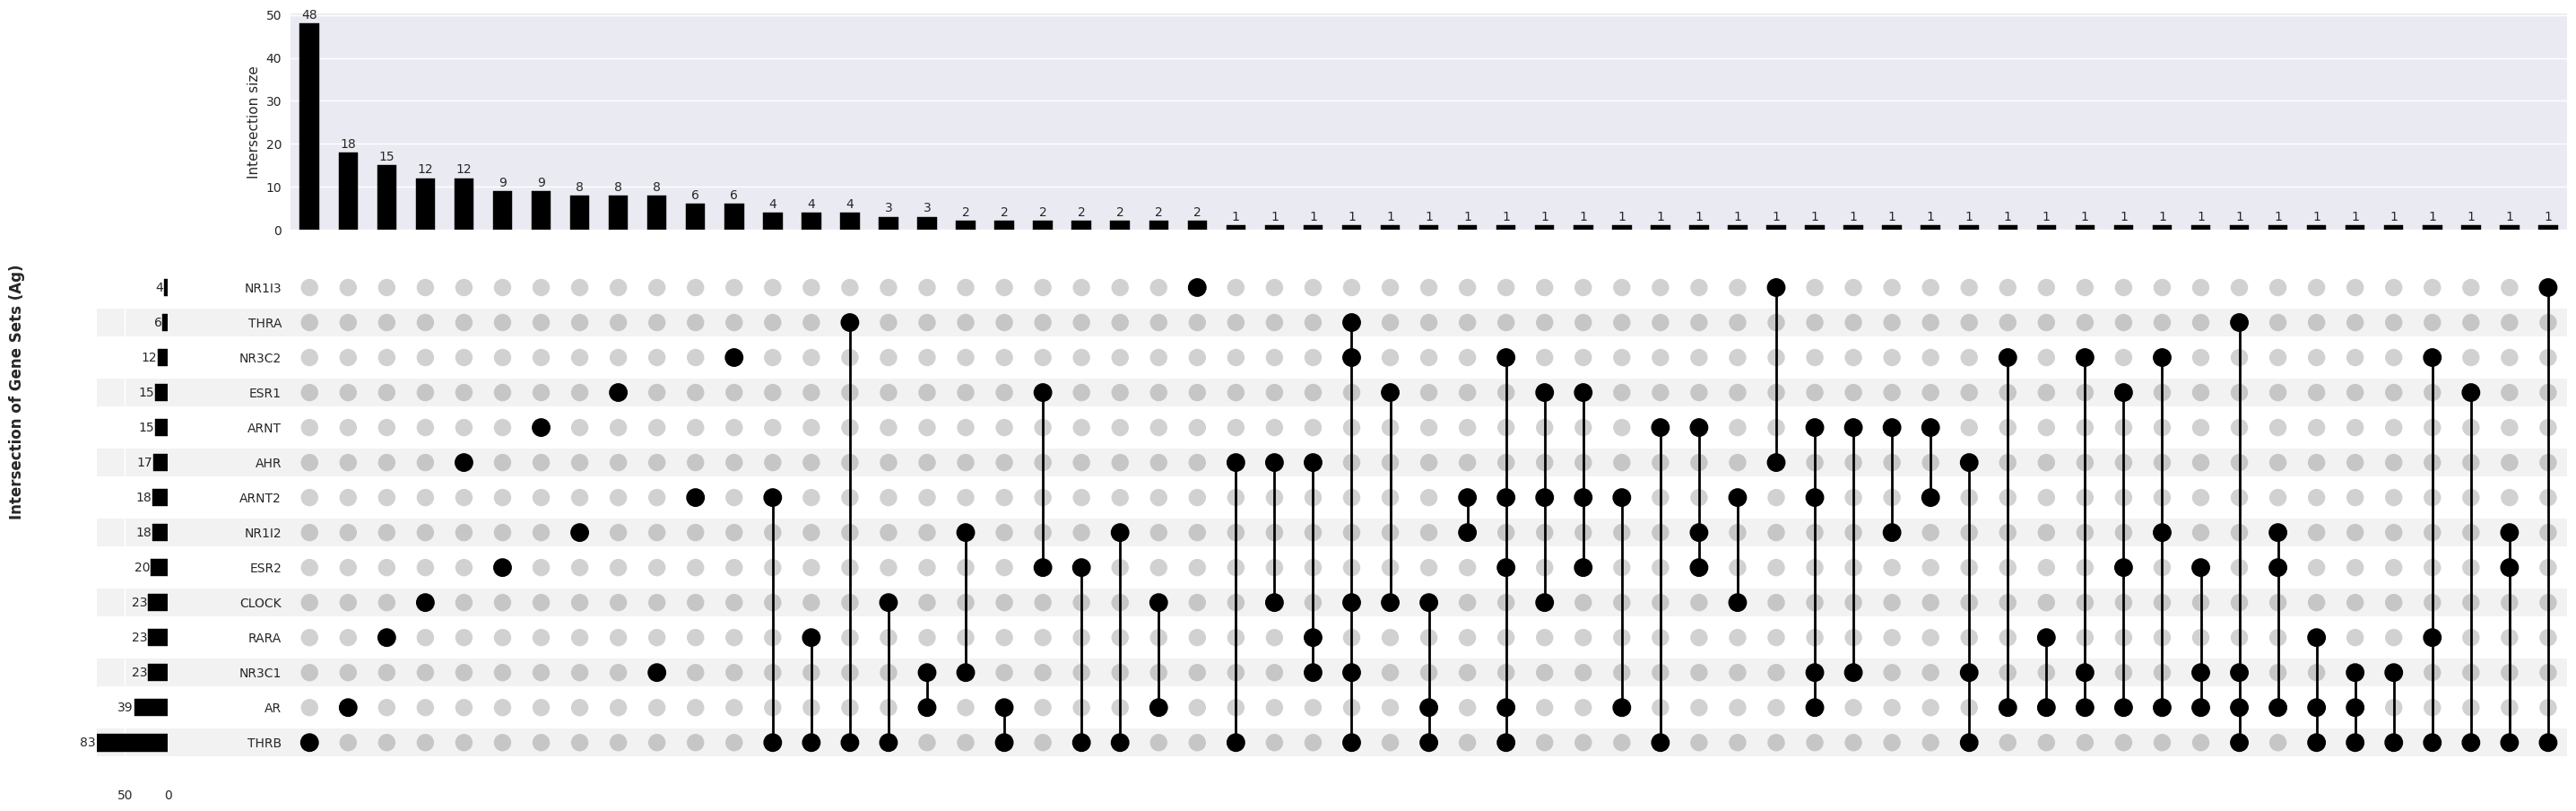

In [151]:
data={key: gene_sets_dict_cell_type_first_celloracle[set_selected][cell_type_selected][key]["targets"] for key in gois}

plot_gene_set_intersections(data, title="Intersection of Gene Sets (Ag)")

### Histograms of the unique genes

Unique genes for each set:

L2-3_CUX2: {'SASH1', 'HTR1B', 'MICAL2', 'BCL9', 'RASGRF2'}

L4_RORB: {'GFRA1', 'RGS6', 'ATF5', 'GDF5', 'NCAM2', 'SESN3', 'FN1', 'KIF26B', 'NR4A3', 'PTPRZ1', 'TUBB2B', 'SOX5', 'BHLHE22', 'LINGO2'}

L5-6_THEMIS: {'HIST1H1E', 'COMMD3-BMI1', 'ETV5', 'TXNIP', 'CH25H', 'USP39', 'RARB', 'HIST1H2BN', 'LPL'}

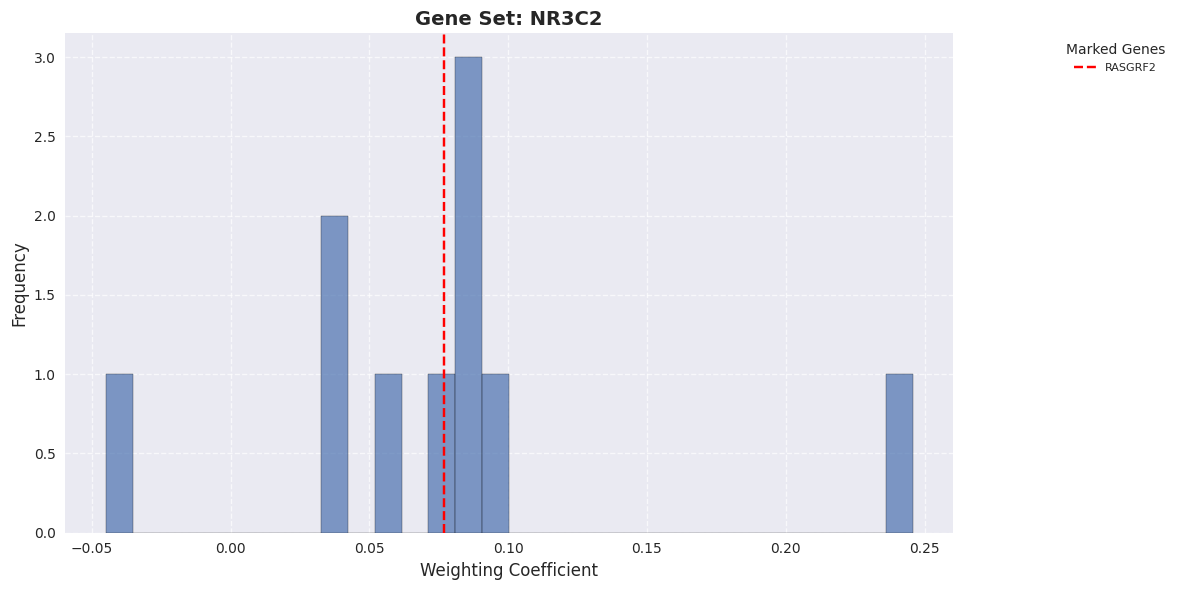

In [152]:
genes_to_mark = ['SASH1', 'HTR1B', 'MICAL2', 'BCL9', 'RASGRF2']
better_hist_GRNs(gene_sets_dict_cell_type_first_celloracle, set_selected, "L2-3_CUX2", "NR3C2", score="coef_mean", bins=30, genes_to_mark=genes_to_mark)

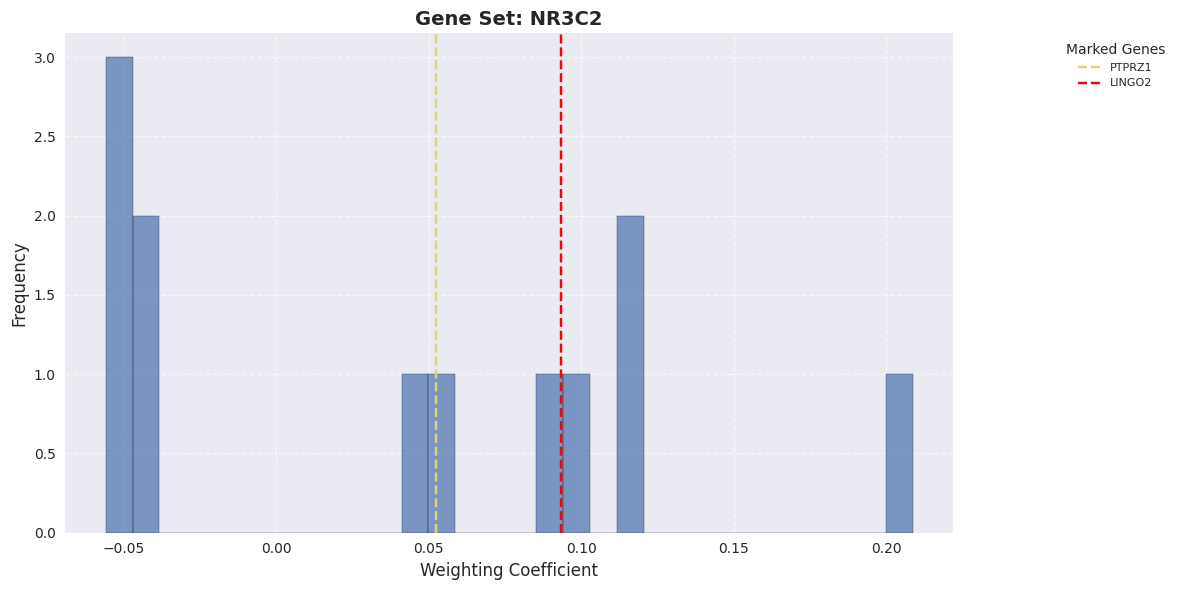

In [153]:
genes_to_mark = ['GFRA1', 'RGS6', 'ATF5', 'GDF5', 'NCAM2', 'SESN3', 'FN1', 'KIF26B', 'NR4A3', 'PTPRZ1', 'TUBB2B', 'SOX5', 'BHLHE22', 'LINGO2']
better_hist_GRNs(gene_sets_dict_cell_type_first_celloracle, set_selected, "L4_RORB", "NR3C2", score="coef_mean", bins=30, genes_to_mark=genes_to_mark)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


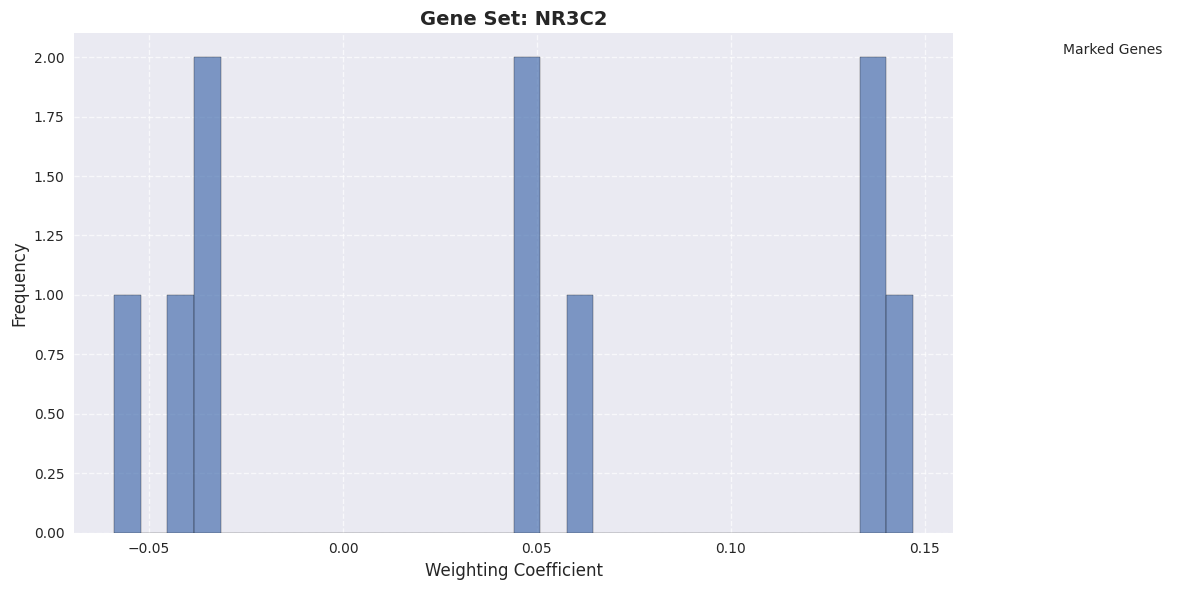

In [154]:
genes_to_mark = ['HIST1H1E', 'COMMD3-BMI1', 'ETV5', 'TXNIP', 'CH25H', 'USP39', 'RARB', 'HIST1H2BN', 'LPL']
better_hist_GRNs(gene_sets_dict_cell_type_first_celloracle, set_selected, "L5-6_THEMIS", "NR3C2", score="coef_mean", bins=30, genes_to_mark=genes_to_mark)